# Convolutional Neural Networks With Tensorflow


### Goal
In this notebook, we're going to create Convolution Neural Networks with the help of tensorflow Library. we will build and train a CNN from scratch. In this notebook we are use tensorflow library. so lets begin the journey of CNN. 

### Learning Objectives
1.   create CNN network from scratch.
2.   understanding what is convolution.
3.   Train your model and visualize the prediction.


### Getting Started
we will begin by importing some useful packages and the dataset you will use to build and train our model. 

In [42]:
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

#### MNIST Dataset
The training images our discriminator will be using is from a dataset called [MNIST](http://yann.lecun.com/exdb/mnist/). It contains 60,000 images of handwritten digits, from 0 to 9, like these:

![dataset image](https://miro.medium.com/max/700/1*LyRlX__08q40UJohhJG9Ow.png)

In [43]:
# loading dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [44]:
batch_size = 128  # batch size for train
no_classes = 10 # class 0-9
epochs = 3
image_height, image_width = 28, 28

#### Visualizing the dataset

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

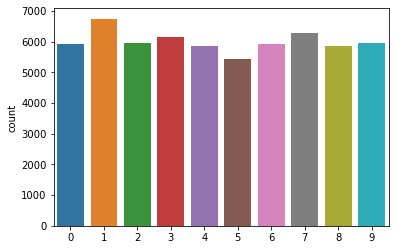

In [45]:
sns.countplot(y_train)

y = 3
size of imge :  (28, 28, 1)


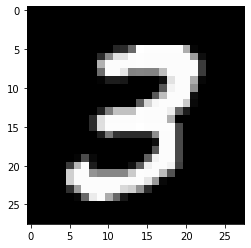

In [47]:
# Example of a picture
index = 7
plt.imshow(x_train[index], cmap='gray')
print ("y = " + str(np.squeeze(y_train[index])))
print("size of imge : " , x_train[index].shape)

#### processing the dataset

In [46]:
# reshape the train train and test add one channel
x_train = x_train.reshape(x_train.shape[0], image_height, image_width, 1)
x_test = x_test.reshape(x_test.shape[0], image_height, image_width, 1)
input_shape = (image_height, image_width, 1)

In [48]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255  # normalization of data
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, no_classes)
y_test = tf.keras.utils.to_categorical(y_test, no_classes)

In [49]:
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)


## Convolution Neural Network
### Convolution layer
You will usually hear about 2D Convolution while dealing with convolutional neural networks for images. It is a simple mathematical operation in which we slide a matrix or kernel of weights over 2D data and perform element-wise multiplication with the data that falls under the kernel. Finally, we sum up the multiplication result to produce one output of that operation.


![dataset image](https://miro.medium.com/max/1320/1*LT0l-KXw5FXIkcGVl-KXlQ.gif)
Input shape : (1, 9, 9) — Output Shape : (1, 7, 7) — K : (3, 3) — P : (0, 0) — S : (1, 1) — D : (1, 1) — G : 1

### Max Pooling layer
Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.
![dataset image](https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png)


### model summary
![dataset image](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F1723677%2F664483930a8dae8d6bdde8521d743b22%2Fimg2.png?generation=1602506057159013&alt=media)

Conv2D layers are convolutions. Each filter (64 in the first  and 128 in the second convolution layers) transforms a part of the image (3*3 for the first two Conv2D layers. The transformation is applied on the whole image.

MaxPool2D is a downsampling filter. It reduces a 2x2 matrix of the image to a single pixel with the maximum value of the 2x2 matrix. The filter aims to conserve the main features of the image while reducing the size.

Dropout is a regularization layer. In our model, 33% of the nodes in the layer are randomly ignores, allowing the network to learn different features. This prevents overfitting.

relu is the rectifier, and it is used to find nonlinearity in the data. It works by returning the input value if the input value >= 0. If the input is negative, it returns 0.

Flatten converts the tensors into a 1D vector.

The Dense layers are an artificial neural network (ANN). The last layer returns the probability that an image is in each class (one for each digit).

As this model aims to categorize the images, we will use a categorical_crossentropy loss function.

In [50]:
# defining model
def simple_cnn(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=input_shape
    ))
    model.add(tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.Dense(units=no_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model


In [51]:
simple_cnn_model = simple_cnn(input_shape)

### Training our model

In [52]:
history = simple_cnn_model.fit(x_train, y_train, batch_size, epochs, (x_test, y_test))

Train on 60000 samples
Epoch 1/3
Epoch 2/3
Epoch 3/3


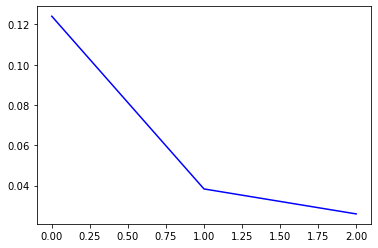

In [59]:
plt.plot(history.history['loss'], color='b', label="Training Loss")

In [55]:
train_loss, train_accuracy = simple_cnn_model.evaluate(
    x_train, y_train, verbose=0)
print('Train data loss:', train_loss)
print('Train data accuracy:', train_accuracy)

Train data loss: 0.012987831147081305
Train data accuracy: 0.9956167


In [57]:
test_loss, test_accuracy = simple_cnn_model.evaluate(
    x_test, y_test, verbose=0)
print('Test data loss:', test_loss)
print('Test data accuracy:', test_accuracy)

Test data loss: 0.03271963581915479
Test data accuracy: 0.9897


In [61]:
# Predict the values from the testing dataset
Y_pred = simple_cnn_model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

### Visulizing pridiction using confusion matrix

<AxesSubplot:>

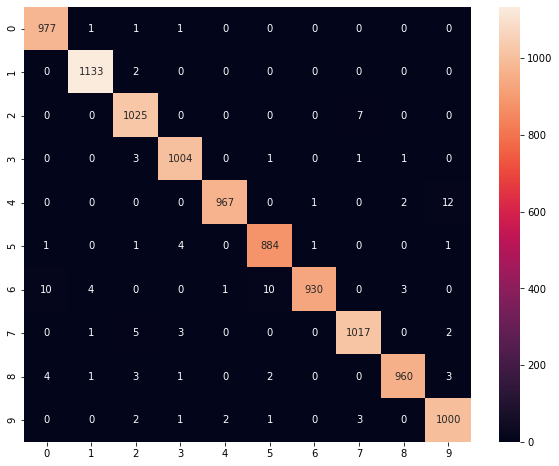

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')